# Data Upload

In [1]:
# prompt: mount my drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile
import os

# Replace with the actual path to your zip file in Google Drive
zip_file_path = "/content/drive/MyDrive/UCMerced_LandUse.zip"

# Destination directory for unzipped files
extract_dir = "/content/UCMerced_LandUse"


if not os.path.exists(extract_dir):
  os.makedirs(extract_dir)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Successfully extracted to: {extract_dir}")
file_paths = []
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        file_paths.append(os.path.join(root,file))
file_paths


Successfully extracted to: /content/UCMerced_LandUse


['/content/UCMerced_LandUse/UCMerced_LandUse/readme.txt.bak',
 '/content/UCMerced_LandUse/UCMerced_LandUse/readme.txt',
 '/content/UCMerced_LandUse/UCMerced_LandUse/Images/intersection/intersection87.tif',
 '/content/UCMerced_LandUse/UCMerced_LandUse/Images/intersection/intersection10.tif',
 '/content/UCMerced_LandUse/UCMerced_LandUse/Images/intersection/intersection09.tif',
 '/content/UCMerced_LandUse/UCMerced_LandUse/Images/intersection/intersection94.tif',
 '/content/UCMerced_LandUse/UCMerced_LandUse/Images/intersection/intersection54.tif',
 '/content/UCMerced_LandUse/UCMerced_LandUse/Images/intersection/intersection41.tif',
 '/content/UCMerced_LandUse/UCMerced_LandUse/Images/intersection/intersection49.tif',
 '/content/UCMerced_LandUse/UCMerced_LandUse/Images/intersection/intersection04.tif',
 '/content/UCMerced_LandUse/UCMerced_LandUse/Images/intersection/intersection76.tif',
 '/content/UCMerced_LandUse/UCMerced_LandUse/Images/intersection/intersection95.tif',
 '/content/UCMerced_

In [3]:
image_path="/content/UCMerced_LandUse/UCMerced_LandUse/Images" # Datapath where the images are stored

# Data Split

In [4]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import PIL
import pathlib
import shutil

In [5]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

# Define paths
image_path = "/content/UCMerced_LandUse/UCMerced_LandUse/Images"
augmented_path = "/content/UCMerced_LandUse_Augmented"

# Create output directory
os.makedirs(augmented_path, exist_ok=True)

# Define augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=20,         # Random rotation
    width_shift_range=0.2,     # Horizontal shift
    height_shift_range=0.2,    # Vertical shift
    shear_range=0.2,           # Shear transformation
    zoom_range=0.2,            # Zooming
    horizontal_flip=True,      # Flip horizontally
    brightness_range=[0.8,1.2] # Adjust brightness
)

# Target number of images per class
TARGET_SIZE = 1000  # Change to 1000 for 1000 images/class

# Process each category
for category in os.listdir(image_path):
    category_path = os.path.join(image_path, category)
    if not os.path.isdir(category_path):
        continue  # Skip non-directory files

    images = os.listdir(category_path)
    category_output = os.path.join(augmented_path, category)
    os.makedirs(category_output, exist_ok=True)

    # Copy original images
    for img in images:
        src = os.path.join(category_path, img)
        dest = os.path.join(category_output, img)
        shutil.copy(src, dest)

    # Augment until reaching TARGET_SIZE
    current_count = len(images)
    while current_count < TARGET_SIZE:
        img_name = random.choice(images)  # Pick a random image
        img_path = os.path.join(category_path, img_name)

        # Load image
        img = load_img(img_path)
        img_array = img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)

        # Generate one augmented image
        for batch in datagen.flow(img_array, batch_size=1):
            new_img = array_to_img(batch[0])
            new_img_name = f"aug_{current_count}.jpg"
            new_img_path = os.path.join(category_output, new_img_name)
            new_img.save(new_img_path)
            current_count += 1
            if current_count >= TARGET_SIZE:
                break  # Stop when target is reached

print(f"Dataset augmented to {TARGET_SIZE} images per class in '{augmented_path}'")


Dataset augmented to 1000 images per class in '/content/UCMerced_LandUse_Augmented'


In [6]:
import os
import shutil
import random

# Define paths
image_path = "/content/UCMerced_LandUse_Augmented"
output_dir = "/content/UCMerced_LandUse_Split"

train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Create output directories
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)

# Process each category
for category in os.listdir(image_path):
    category_path = os.path.join(image_path, category)
    if not os.path.isdir(category_path):
        continue  # Skip non-directory files

    images = sorted(os.listdir(category_path))  # Sort images to maintain order
    random.shuffle(images)  # ✅ Shuffle before splitting

    # Compute split indices
    total_images = len(images)
    train_end = int(train_ratio * total_images)
    val_end = train_end + int(val_ratio * total_images)

    # Assign images to splits
    splits = {
        "train": images[:train_end],
        "val": images[train_end:val_end],
        "test": images[val_end:]
    }

    # Copy images to respective folders
    for split, split_images in splits.items():
        split_category_path = os.path.join(output_dir, split, category)
        os.makedirs(split_category_path, exist_ok=True)

        for img in split_images:
            src = os.path.join(category_path, img)
            dest = os.path.join(split_category_path, img)
            shutil.copy(src, dest)

print("Dataset successfully shuffled and split into train (70%), val (20%), and test (10%).")


Dataset successfully shuffled and split into train (70%), val (20%), and test (10%).


In [7]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os

def load_tif_image(image_path, target_size=(256, 256)):
    img = Image.open(image_path).convert("RGB")  # Convert to RGB
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize
    return img_array.astype(np.float32)  # Ensure correct dtype

def data_generator(directory):
    class_names = sorted(os.listdir(directory))  # Label names
    for label_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for image_file in os.listdir(class_dir):
                if image_file.endswith(".tif"):  # Ensure only .tif files
                    image_path = os.path.join(class_dir, image_file)
                    img = load_tif_image(image_path)  # Load image
                    yield img, label_idx  # Yield image and label
def create_tf_dataset(directory, batch_size=32, shuffle_buffer_size=1000):
    dataset = tf.data.Dataset.from_generator(
        lambda: data_generator(directory),
        output_signature=(
            tf.TensorSpec(shape=(256, 256, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(), dtype=tf.int32)
        )
    )
    dataset = dataset.shuffle(buffer_size=shuffle_buffer_size)  # 🔄 Shuffle dataset
    return dataset.batch(batch_size)


# Create datasets
train_dataset = create_tf_dataset("/content/UCMerced_LandUse_Split/train")
val_dataset = create_tf_dataset("/content/UCMerced_LandUse_Split/val")
test_dataset = create_tf_dataset("/content/UCMerced_LandUse_Split/test")

# Check shapes
for images, labels in train_dataset.take(1):
    print("Image batch shape:", images.shape)  # ✅ Should be (batch_size, 256, 256, 3)
    print("Label batch shape:", labels.shape)  # ✅ Should be (batch_size,)


Image batch shape: (32, 256, 256, 3)
Label batch shape: (32,)


In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN Model
def build_model(optimizer):
    inputs = keras.Input(shape=(256, 256, 3))

    # Conv Blocks
    x = layers.Conv2D(32, (3, 3), padding="same", use_bias=True)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), padding="same", use_bias=True)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), padding="same", use_bias=True)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), padding="same", use_bias=True)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(512, (3, 3), padding="same", use_bias=True)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(21, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


# List of optimizers to test
optimizers = {
    "SGD": keras.optimizers.SGD(learning_rate=0.01),
    "RMSprop": keras.optimizers.RMSprop(learning_rate=0.0001),
    "Adam": keras.optimizers.Adam(learning_rate=0.0001),
    "Adadelta": keras.optimizers.Adadelta(learning_rate=0.0001),
    "Adagrad": keras.optimizers.Adagrad(learning_rate=0.0001),
    "Adamax": keras.optimizers.Adamax(learning_rate=0.0001),
    "Nadam": keras.optimizers.Nadam(learning_rate=0.0001),
    "Ftrl": keras.optimizers.Ftrl(learning_rate=0.0001)
}

In [12]:
# prompt: print shape of train_dataset

train_dataset.element_spec[0].shape


TensorShape([None, 256, 256, 3])

In [13]:
for images, labels in train_dataset.take(5):
    print("Image shape:", images.shape)  # (batch_size, 256, 256, 3)
    print("Label:", labels.numpy())  # Convert to NumPy for readability



Image shape: (32, 256, 256, 3)
Label: [12  5  0  0  1 12  4 11  9 11  0 11  9  4  3  9  9 11  1 12 10 12  4 12
 11 14  6 12  8  6  2  5]
Image shape: (32, 256, 256, 3)
Label: [10  4 14  0  4  5 10 10  4  3  4 14  0  7  2 11  1 12  3 13  5  2  1 11
  7 13  9  0  6 13 11  1]
Image shape: (32, 256, 256, 3)
Label: [ 6  2 13 13  5 11 12 13 14  5  1  2  5  5  4 10  3  6  5 11  4 14 10  5
 13  2  7  1  5 13  6  8]
Image shape: (32, 256, 256, 3)
Label: [ 6  7 15 12  6 13  9  4  2  5  2  5  1  9  8 12  6  0  5  1 10  3  2 11
  4 15 12 14 13  6  4  4]
Image shape: (32, 256, 256, 3)
Label: [ 2  6  2 14 12  1 11  6  8 13  6  0 14  2  7 15  7 15  4  8  7  7 15  3
  9  4  2  4 12  7 16 12]


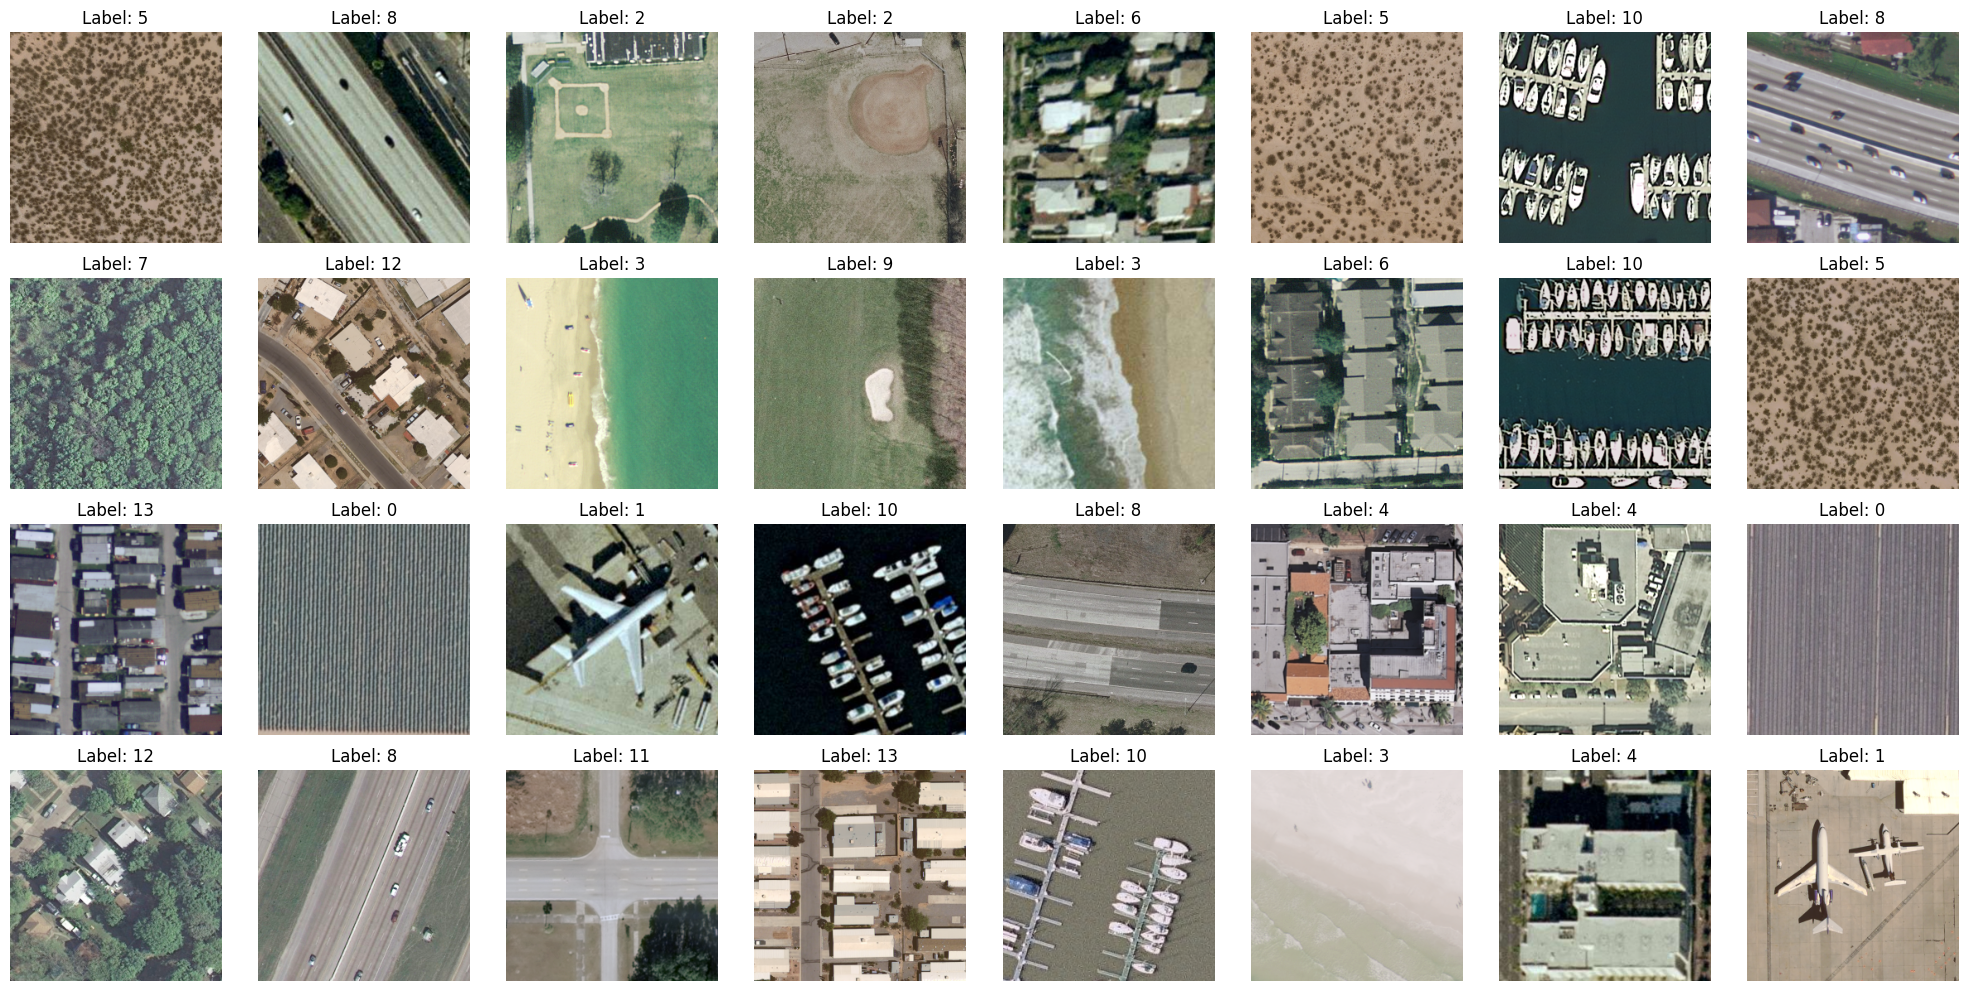

In [14]:
# prompt: I want to display all the 32 images present in a batch

import matplotlib.pyplot as plt

# Assuming train_dataset is your TensorFlow Dataset
for images, labels in train_dataset.take(1):  # Take one batch
    # Display images in a grid
    fig, axes = plt.subplots(4, 8, figsize=(20, 10))  # Adjust grid size as needed
    axes = axes.ravel()  # Flatten the axes array
    for i in range(32):  # Display all 32 images in the batch
        axes[i].imshow(images[i])
        axes[i].set_title(f"Label: {labels[i].numpy()}")
        axes[i].axis('off')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()



Training with SGD optimizer:
Epoch 1/50
     47/Unknown 25s 249ms/step - accuracy: 0.1777 - loss: 3.1623

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 327ms/step - accuracy: 0.1785 - loss: 3.1560 - val_accuracy: 0.0582 - val_loss: 3.1682
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.3268 - loss: 2.2226 - val_accuracy: 0.0430 - val_loss: 3.6573
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.3930 - loss: 1.9354 - val_accuracy: 0.0658 - val_loss: 4.2573
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.4316 - loss: 1.8032 - val_accuracy: 0.0430 - val_loss: 4.7189
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.4922 - loss: 1.5074 - val_accuracy: 0.0608 - val_loss: 4.8408
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.5197 - loss: 1.4395 - val_accuracy: 0.1241 - val_loss: 4.3476
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.5646 - loss: 1.3792 - val_accuracy: 0.1823 - val_loss: 3.5689
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.5449 - loss: 1.4166 - val_accuracy: 0.1367

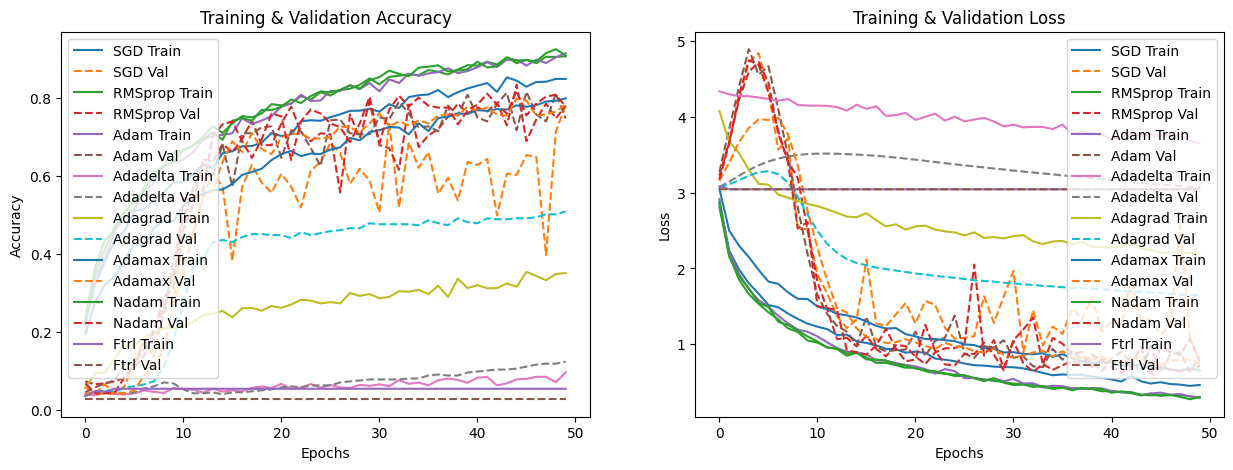

In [15]:
# Store training history
histories = {}

for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer:")
    model = build_model(optimizer)

    history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    verbose=1  # Change to 2 if you don't want the progress bar
    )


    histories[name] = history.history  # Store history


# Plot training and validation accuracy/loss
def plot_metrics(histories):
    plt.figure(figsize=(15, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    for name, history in histories.items():
        plt.plot(history["accuracy"], label=f"{name} Train")
        plt.plot(history["val_accuracy"], linestyle="dashed", label=f"{name} Val")
    plt.title("Training & Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    for name, history in histories.items():
        plt.plot(history["loss"], label=f"{name} Train")
        plt.plot(history["val_loss"], linestyle="dashed", label=f"{name} Val")
    plt.title("Training & Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


# Call the function to plot
plot_metrics(histories)

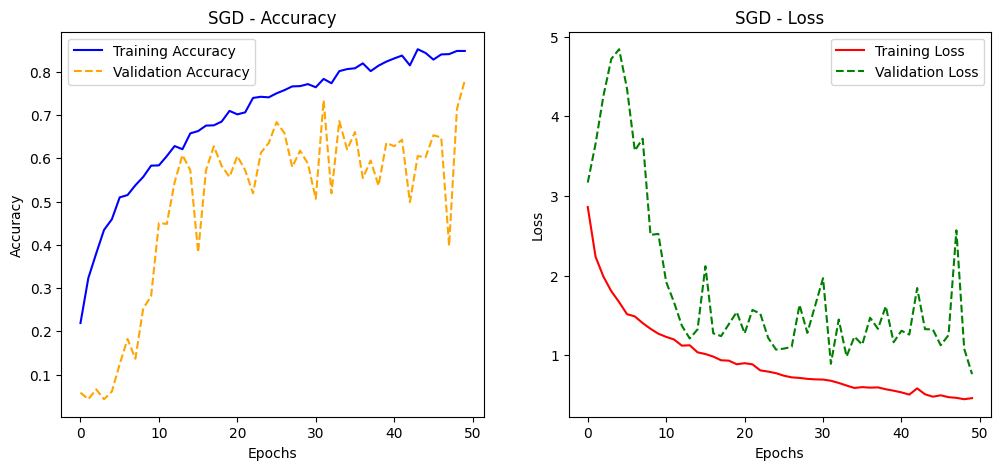

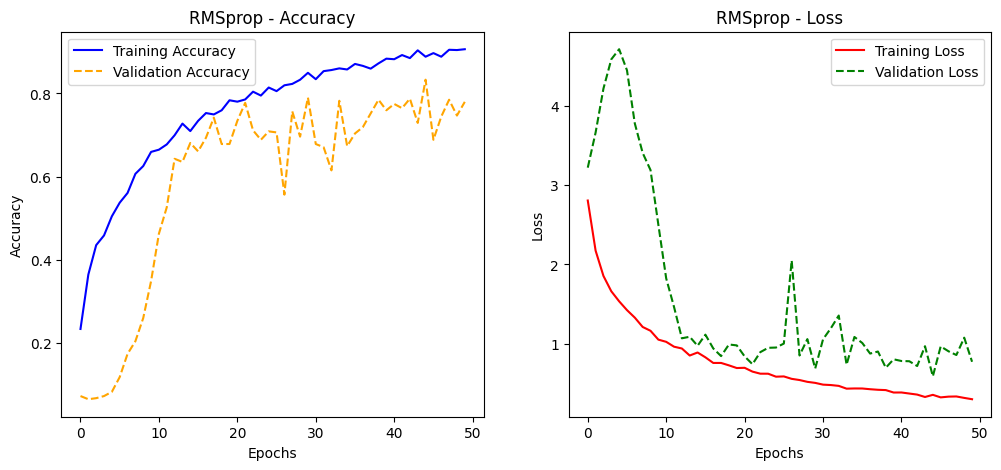

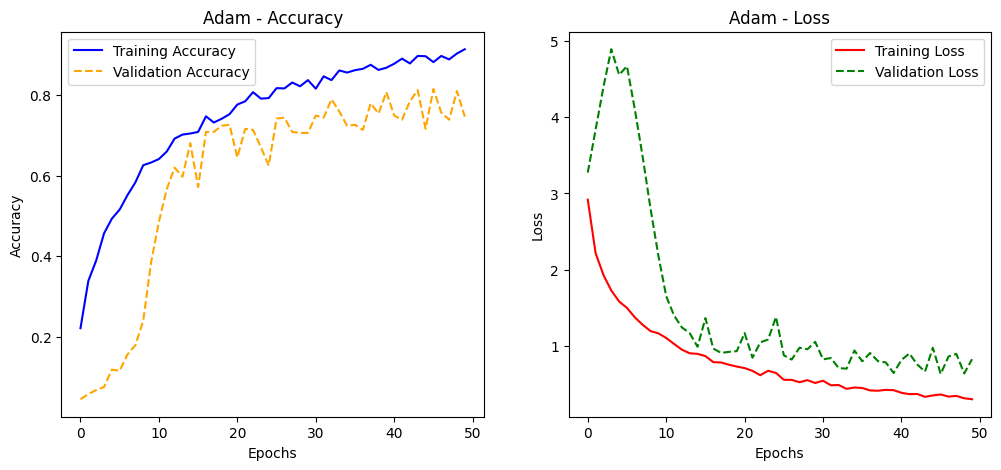

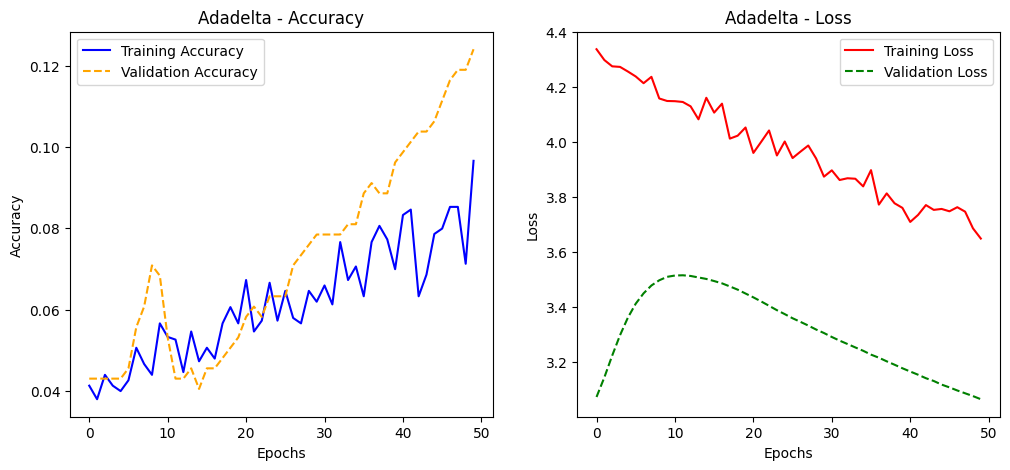

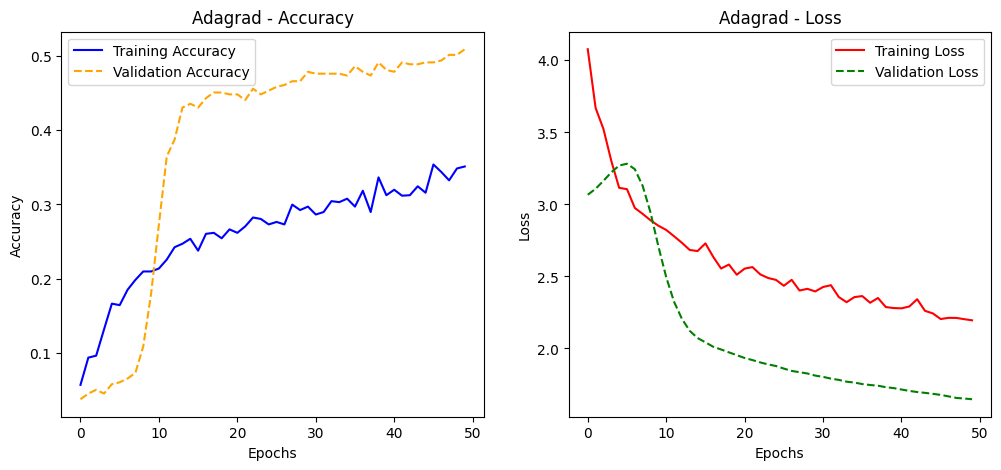

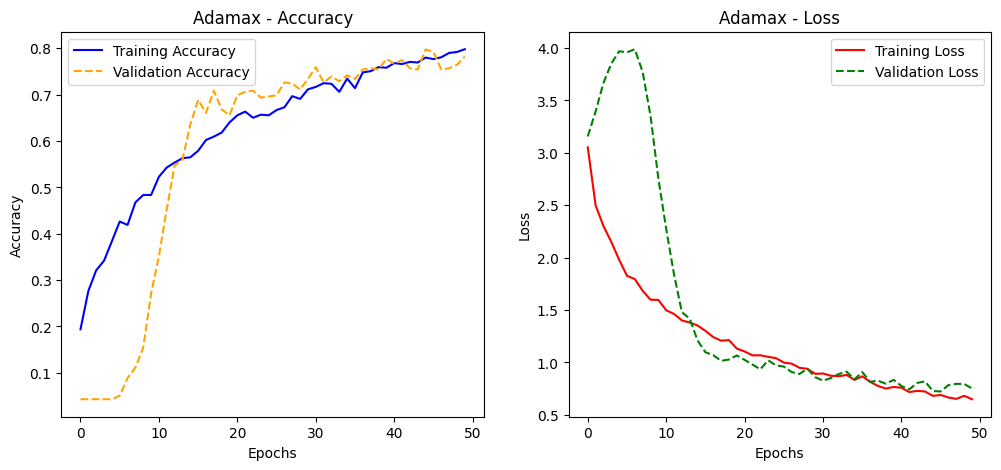

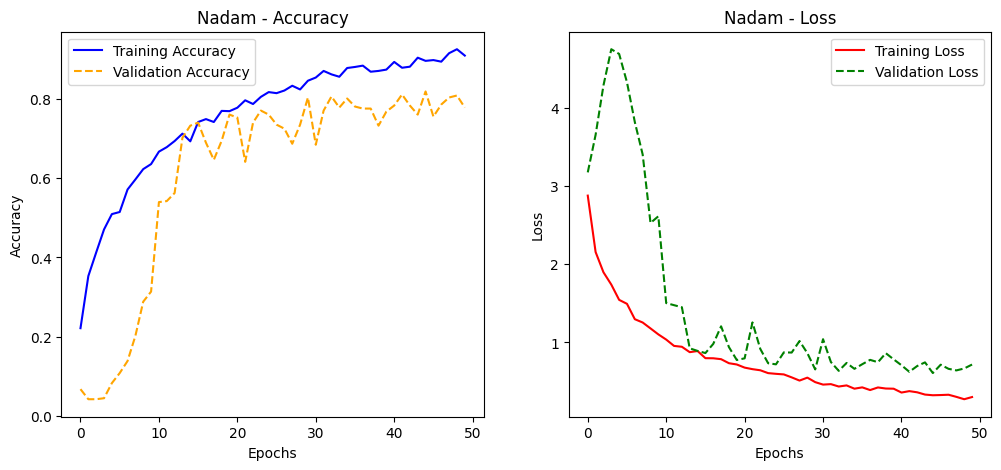

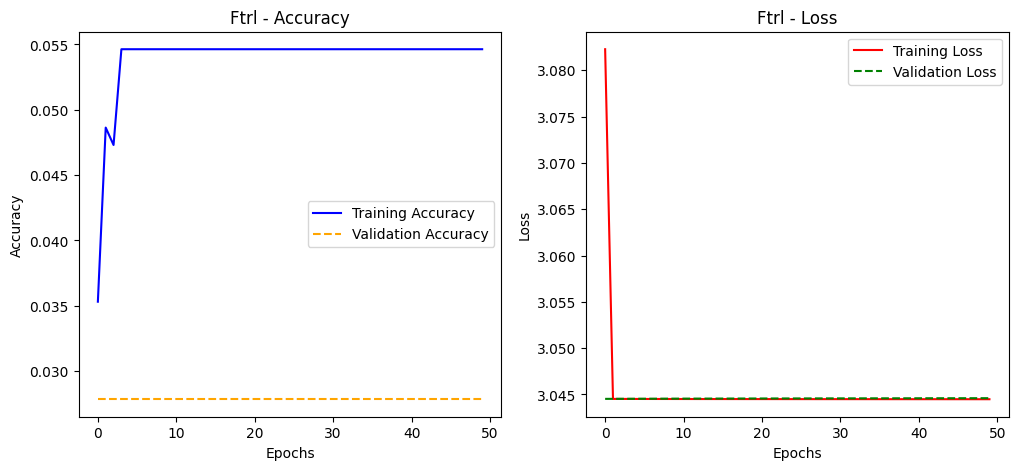

In [26]:
def plot_metrics_individual(histories):
    for name, history in histories.items():
        plt.figure(figsize=(12, 5))

        # Plot accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history["accuracy"], label="Training Accuracy", color="blue")
        plt.plot(history["val_accuracy"], linestyle="dashed", label="Validation Accuracy", color="orange")
        plt.title(f"{name} - Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history["loss"], label="Training Loss", color="red")
        plt.plot(history["val_loss"], linestyle="dashed", label="Validation Loss", color="green")
        plt.title(f"{name} - Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()

        # Show the plots for the current optimizer
        plt.show()


# Call the function to plot individual graphs for each optimizer
plot_metrics_individual(histories)

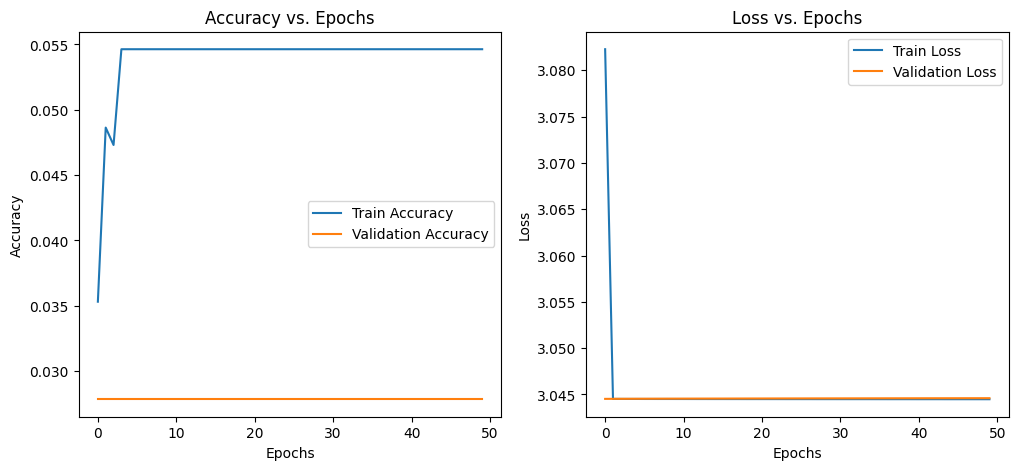

In [17]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values
history_dict = history.history

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["accuracy"], label="Train Accuracy")
plt.plot(history_dict["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epochs")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_dict["loss"], label="Train Loss")
plt.plot(history_dict["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs")
plt.legend()

plt.show()
